## Load Stuff

In [12]:
import torch
from mario_gpt import MarioDataset, MarioLM, TrainingConfig, MarioGPTTrainer
from mario_gpt.utils import view_level, convert_level_to_png, join_list_of_list, characterize

In [13]:
BASE = "distilgpt2"

In [14]:
from transformers import AutoConfig, AutoModelWithLMHead

In [15]:
mario_lm = MarioLM(lm_path=BASE, tokenizer_path=BASE)

Using distilgpt2 lm


/Users/james/Envs/research3.11/lib/python3.11/site-packages/transformers/models/auto/modeling_auto.py:1499: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(
Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at distilgpt2 and are newly initialized: ['transformer.h.0.crossattention.c_proj.bias', 'transformer.h.4.crossattention.c_attn.weight', 'transformer.h.0.crossattention.c_proj.weight', 'transformer.h.4.crossattention.q_attn.weight', 'transformer.h.2.crossattention.c_attn.weight', 'transformer.h.2.ln_cross_attn.bias', 'transformer.h.3.crossattention.c_proj.bias', 'transformer.h.4.crossattention.c_attn.bias', 'transformer.h.2.ln_cross_attn.weight', 'transformer.h.3.crossattention.q_attn.weight', 'transformer.h.0.crossattent

Using distilgpt2 tokenizer


### Load Dataset (Optional)

In [16]:
dataset = MarioDataset(mario_lm.tokenizer)

Token indices sequence length is longer than the specified maximum sequence length for this model (102116 > 1024). Running this sequence through the model will result in indexing errors


No level string specified, using default string FULL_LEVEL_STR_WITH_PATHS...





In [23]:
view_level(dataset.input_ids[:700], dataset.tokenizer)

['--------------------------------------------------',
 '--------------------------------------------------',
 '--------------------------------------------------',
 '--------------------------------------------------',
 '-------------------------------------------------o',
 '--------XSSSSS---------------------------------SSS',
 '--------X-----------------------------------------',
 '--------X-----------------------------------------',
 '-------EX--E-X---------------xxxx-?-----------xxxx',
 '--------XSS?SX---QQ?QQ------xx<>-x-----------xx--?',
 '---------------------------xx-[]--x---------xx----',
 '--------------------------xx--[]---x-------xx-----',
 'xxxxxxxxxxxxxxxxxxxxxxxxxxx---[]----xxxxxxxx------',
 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---XXX']

/home/kokkgoblin/miniconda3/envs/py39/lib/python3.9/site-packages/Pillow-9.1.1-py3.9-linux-x86_64.egg/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


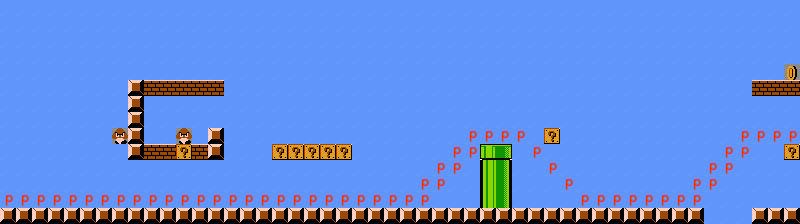

In [7]:
img = convert_level_to_png(dataset.input_ids[:700],  dataset.tokenizer)[0]
img

### Setup training

In [17]:
config = TrainingConfig(save_iteration=10)

In [18]:
trainer = MarioGPTTrainer(mario_lm, dataset, config=config)

In [20]:
trainer.train(20000, batch_size=1)

Training for 20000 Iterations and batch_size 1
================== Training Config ==================
gradient_accumulation_steps -- 1
mixed_precision -- no
output_dir -- Mario-GPT2-700-context-length
learning_rate -- 0.0005
epsilon -- 1e-09
lr_warmup_steps -- 1000
batch_size -- 4
total_steps -- 50000
mask_proportion -- 0.0
eval_iteration -- 1000
save_iteration -- 10
================== MarioLM ==================
Follow tensorboard with: python -m tensorboard.main --logdir /Users/james/playground/mario-gpt/notebooks/Mario-GPT2-700-context-length


{'loss': 0.04161557927727699, 'last_lr': 0.0003379387755102041}:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 13479/20000 [2:38:30<1:16:41,  1.42it/s]


RuntimeError: [enforce fail at inline_container.cc:424] . unexpected pos 14592 vs 14486

In [24]:
dataset.tokenizer.save_pretrained("Mario-GPT2-700-context-length-tokenizer")

('Mario-GPT2-700-context-length-tokenizer/tokenizer_config.json',
 'Mario-GPT2-700-context-length-tokenizer/special_tokens_map.json',
 'Mario-GPT2-700-context-length-tokenizer/vocab.json',
 'Mario-GPT2-700-context-length-tokenizer/merges.txt',
 'Mario-GPT2-700-context-length-tokenizer/added_tokens.json',
 'Mario-GPT2-700-context-length-tokenizer/tokenizer.json')

shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 13, last: 61: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1400/1400 [03:33<00:00,  6.55it/s]
/Users/james/Envs/research3.11/lib/python3.11/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2BC541AD0> (0, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2BC541AD0> (1, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2BC541AD0> (2, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2BC541AD0> (3, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2BC541AD0> (4, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2BC541AD0> (5, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2BC541AD0> (6, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2BC541AD0> (7, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2BC541AD0> (8, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2BC541AD0> (9, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2BC541

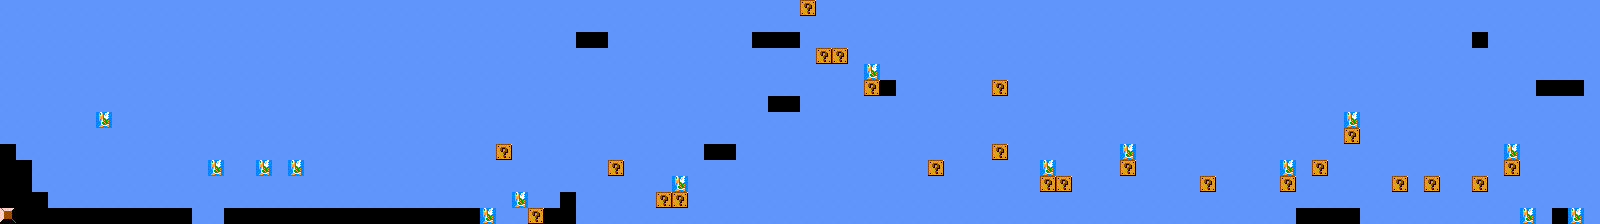

In [10]:
prompts = ["many pipes, many enemies, some blocks, high elevation"]
mario_lm_cpu = mario_lm.to(torch.device('cpu'))
generated_level = mario_lm_cpu.sample(
    prompts=prompts,
    num_steps=1400,
    temperature=2.0,
    use_tqdm=True
)
generated_level.img